In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import imageio

In [3]:
class City:
    def __init__(self, MAP_SIZE=10, R=0):

        rand_list = [random.randint(0, 3, MAP_SIZE) for _ in range(MAP_SIZE)]
        self.data = np.array(rand_list)
        self.color_map = 'binary'
        self.R = R
        self.NOT_AGENT_VAL = 2


    def plot_map(self):

        fig, ax = subplots(figsize=(8, 6))
        ax.imshow(self.data, cmap=self.color_map)
        axis('off')
        show()

    def is_inside_map(self, y, x):

        n, m = self.data.shape[1], self.data.shape[0]
        inside = (0 <= x <= n - 1 and 0 <= y <= m - 1)
        return inside

    def count_same_neighbors(self, i, j):

        full_list = [(i-1, j-1),(i-1, j),(i-1, j+1),
            (i, j-1),(i, j+1),(i+1, j-1),(i+1, j),(i+1, j+1)
        ]

        num_of_similar = 0
        for y, x in full_list:
            if self.is_inside_map(y, x) and self.data[y, x] == self.data[i, j]:
                num_of_similar += 1

        return num_of_similar

    def exchange_cells(self, c1, c2):

        temp = self.data[c1[0], c1[1]]
        self.data[c1[0], c1[1]] = self.data[c2[0], c2[1]]
        self.data[c2[0], c2[1]] = temp

    def get_next_step(self):

        n_angry_agents = 0
        for y in range(self.data.shape[0]):
            for x in range(self.data.shape[1]):

                if self.data[y, x] == self.NOT_AGENT_VAL:
                    continue

                n = self.count_same_neighbors(y, x)

                if n < self.R:
                    y_list, x_list = where(self.data == self.NOT_AGENT_VAL)
                    rand_id = random.choice(len(x_list))
                    j, i = x_list[rand_id], y_list[rand_id]
                    self.exchange_cells((i, j), (y, x))
                    n_angry_agents += 1

        return n_angry_agents



    def save_gif(self, n_epochs):

        fig, ax = subplots(figsize=(8, 6))
        filenames = []

        for index in range(n_epochs):

            self.get_next_step()
            ax.imshow(self.data, cmap=self.color_map)
            filenames.append(f's_{self.R}{index}.png')
            savefig(f'shelling_pics/{filenames[-1]}', dpi=200)

        images = []
        for filename in filenames:
            images.append(imageio.imread(f'shelling_pics/{filename}'))

        imageio.mimsave(f'shelling_r={self.R / 8}.gif', images)

In [4]:
city = City(100, 4)

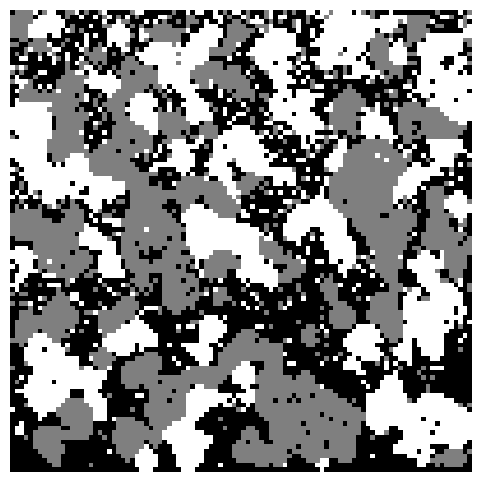

In [5]:
n_steps = 10

for _ in range(n_steps):
    city.get_next_step()

city.plot_map()

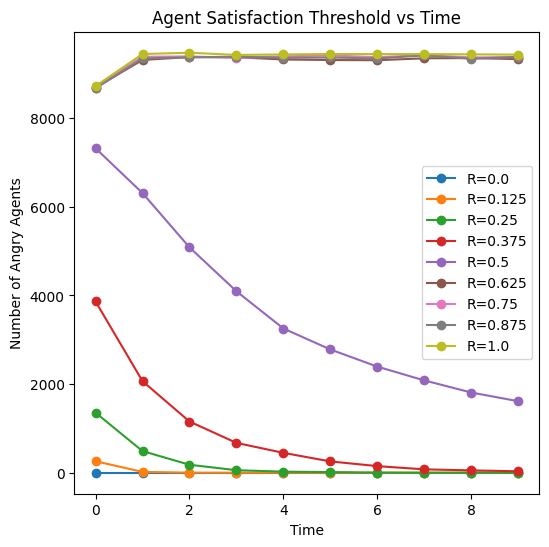

In [7]:
R = [x for x in range(0, 9)]
num = 10
fig, ax = subplots(figsize=(6, 6))

ax.set_xlabel('Time')
ax.set_ylabel('Number of Angry Agents')
ax.set_title('Agent Satisfaction Threshold vs Time')


for r in R:
    city_obj = City(MAP_SIZE=100, R=r)
    agents_list = []
    times_list = []

    for i in range(num):
        agents_list.append(city_obj.get_next_step())
        times_list.append(i)

    ax.plot(times_list, agents_list, '-o', label=f'R={r / 8}')

ax.legend()
show()